In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset0 = pd.read_csv('./cdn_memory_used.csv')
dataset0.head(3)

,time,host,value,stat_month,stat_date
0,2019-01-25T16:01:17Z,fj3-cmcdn0.fjnd.cmcdn.net,5.314170,201901,20190126
1,2019-01-25T16:01:27Z,fj3-cmcdn0.fjnd.cmcdn.net,5.314117,201901,20190126
2,2019-01-25T16:01:37Z,fj3-cmcdn0.fjnd.cmcdn.net,5.313606,201901,20190126


In [3]:
dataset1 = pd.read_csv('./cdn_memory_used.csv', index_col=0, parse_dates=[0])
dataset1.head(3)

,host,value,stat_month,stat_date
time,,,,
2019-01-25 16:01:17,fj3-cmcdn0.fjnd.cmcdn.net,5.314170,201901,20190126
2019-01-25 16:01:27,fj3-cmcdn0.fjnd.cmcdn.net,5.314117,201901,20190126
2019-01-25 16:01:37,fj3-cmcdn0.fjnd.cmcdn.net,5.313606,201901,20190126


In [4]:
train_data = dataset1.iloc[:,0:2]

In [5]:
train_data.head(3)


,host,value
time,,
2019-01-25 16:01:17,fj3-cmcdn0.fjnd.cmcdn.net,5.314170
2019-01-25 16:01:27,fj3-cmcdn0.fjnd.cmcdn.net,5.314117
2019-01-25 16:01:37,fj3-cmcdn0.fjnd.cmcdn.net,5.313606


In [6]:
train_data[['host', 'value']].groupby(['host'], as_index=False).max()

,host,value
0,fj3-cmcdn0.fjnd.cmcdn.net,5.334425
1,gxdd2-cmcdn1.gxnn.cmcdn.net,0.719745
2,jswx01-cmcdn0.jswx.cmcdn.net,97.791773
3,jswx04-cmcdn0.jswx.cmcdn.net,97.728817
4,sc3-cmcdn3.scyd.cmcdn.net,98.510051
5,zjwz-cmcdn8.wzyd.cmcdn.net,96.437244
6,zjwz-cmcdn9.wzyd.cmcdn.net,96.794960


In [7]:
train_data = train_data.drop(train_data[train_data['host']=='fj3-cmcdn0.fjnd.cmcdn.net'].index, axis=0)
train_data = train_data.drop(train_data[train_data['host']=='gxdd2-cmcdn1.gxnn.cmcdn.net'].index, axis=0)

In [8]:
value_hour = train_data.groupby('host')['value'].resample('１min').mean()

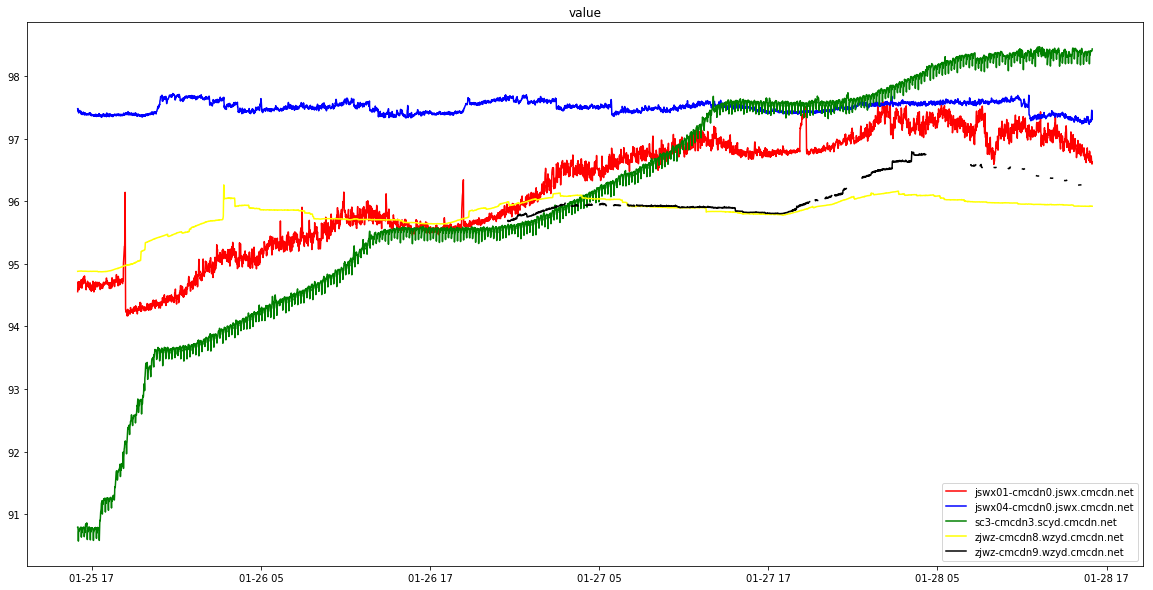

In [9]:
plt.figure(figsize=(20,10))
plt.title('value')
plt.plot(value_hour['jswx01-cmcdn0.jswx.cmcdn.net'], color='red', label='jswx01-cmcdn0.jswx.cmcdn.net')
plt.plot(value_hour['jswx04-cmcdn0.jswx.cmcdn.net'], color='blue', label='jswx04-cmcdn0.jswx.cmcdn.net')
plt.plot(value_hour['sc3-cmcdn3.scyd.cmcdn.net'], color='green', label='sc3-cmcdn3.scyd.cmcdn.net')
plt.plot(value_hour['zjwz-cmcdn8.wzyd.cmcdn.net'], color='yellow', label='zjwz-cmcdn8.wzyd.cmcdn.net')
plt.plot(value_hour['zjwz-cmcdn9.wzyd.cmcdn.net'], color='black', label='zjwz-cmcdn9.wzyd.cmcdn.net')
plt.legend(loc='best')
plt.show()


In [10]:
value_diff1 = value_hour['jswx01-cmcdn0.jswx.cmcdn.net'].diff()
value_diff2 = value_hour['jswx04-cmcdn0.jswx.cmcdn.net'].diff()
value_diff3 = value_hour['sc3-cmcdn3.scyd.cmcdn.net'].diff()
value_diff4 = value_hour['zjwz-cmcdn8.wzyd.cmcdn.net'].diff()
value_diff5 = value_hour['zjwz-cmcdn9.wzyd.cmcdn.net'].diff()

In [11]:
value_diff1 = value_diff1.dropna()
value_diff2 = value_diff2.dropna()
value_diff3 = value_diff3.dropna()
value_diff4 = value_diff4.dropna()
value_diff5 = value_diff5.dropna()

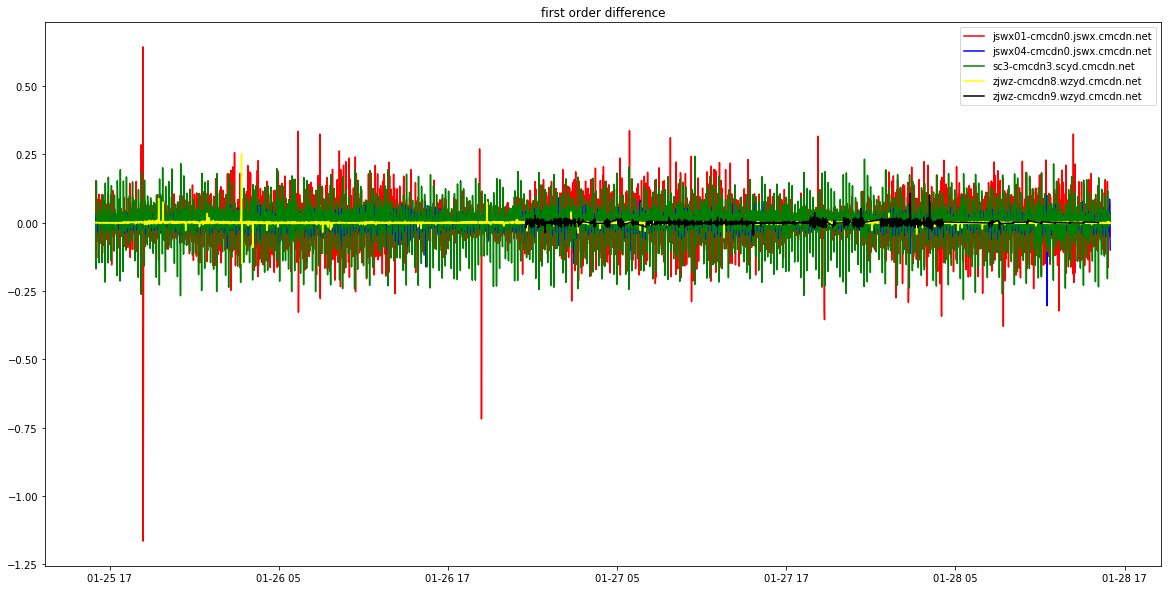

In [12]:
plt.figure(figsize=(20,10))
plt.plot(value_diff1, color='red', label='jswx01-cmcdn0.jswx.cmcdn.net')
plt.plot(value_diff2, color='blue', label='jswx04-cmcdn0.jswx.cmcdn.net')
plt.plot(value_diff3, color='green', label='sc3-cmcdn3.scyd.cmcdn.net')
plt.plot(value_diff4, color='yellow', label='zjwz-cmcdn8.wzyd.cmcdn.net')
plt.plot(value_diff5, color='black', label='zjwz-cmcdn9.wzyd.cmcdn.net')
plt.title('first order difference')
plt.legend(loc='best')
plt.show()

In [13]:
cate1 = train_data[train_data['host']=='jswx01-cmcdn0.jswx.cmcdn.net']
cate2 = train_data[train_data['host']=='jswx04-cmcdn0.jswx.cmcdn.net']
cate3 = train_data[train_data['host']=='sc3-cmcdn3.scyd.cmcdn.net']
cate4 = train_data[train_data['host']=='zjwz-cmcdn8.wzyd.cmcdn.net']
cate5 = train_data[train_data['host']=='zjwz-cmcdn9.wzyd.cmcdn.net']
cate = [cate1, cate2, cate3, cate4, cate5]


In [14]:
cate1.value.head(3)

time
2019-01-25 16:00:09    94.697833
2019-01-25 16:00:19    94.425227
2019-01-25 16:00:29    94.462627
Name: value, dtype: float64

In [15]:
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa import adfvalues
from statsmodels.tsa.stattools import acf, pacf

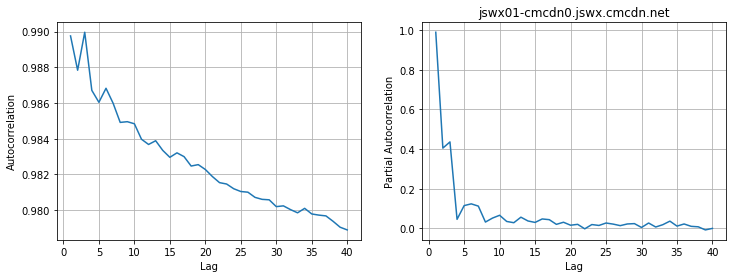

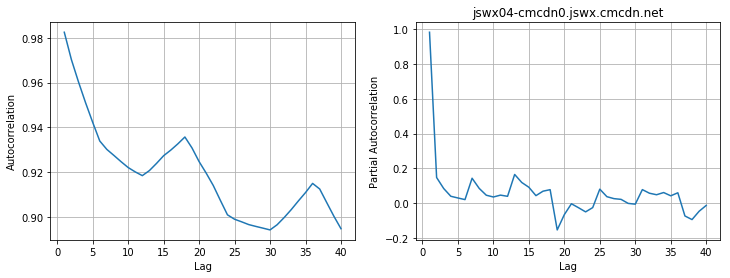

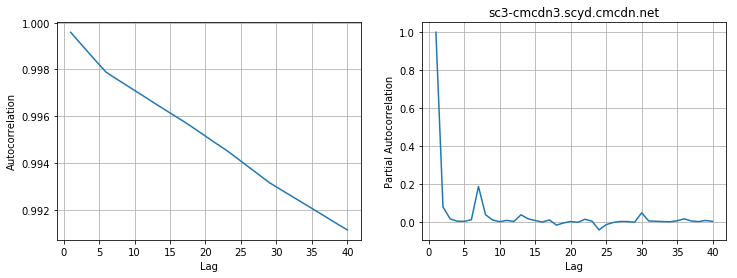

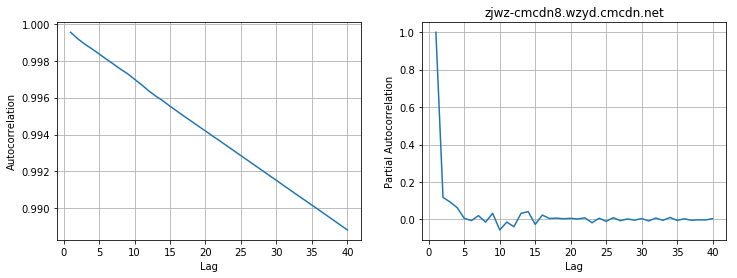

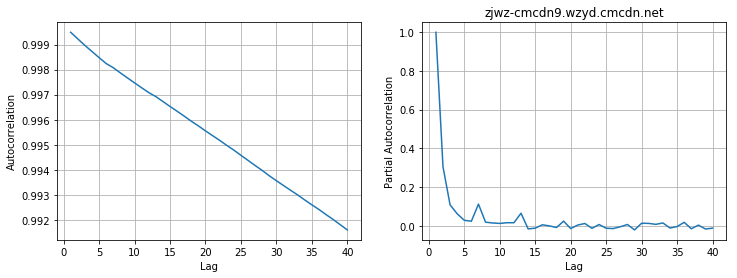

In [16]:
title = ['jswx01-cmcdn0.jswx.cmcdn.net', 'jswx04-cmcdn0.jswx.cmcdn.net', 'sc3-cmcdn3.scyd.cmcdn.net',
        'zjwz-cmcdn8.wzyd.cmcdn.net', 'zjwz-cmcdn9.wzyd.cmcdn.net']
for i in range(len(cate)):
    fig = plt.figure(1,figsize=[12,4])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    data = np.array(cate[i].value)
    autocorr = acf(data)
    pac = pacf(data)

    x = [x for x in range(len(pac))]
    ax1.plot(x[1:],autocorr[1:])
    ax1.grid(True)
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')

    ax2.plot(x[1:],pac[1:])
    ax2.grid(True)
    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    plt.title(title[i])
    plt.show()

Cate1的自相关系数有较快收敛，　序列比较平稳，　所以不需要再进行处理,

平稳序列的部分相关系数有较快收敛，　所以ｑ=０

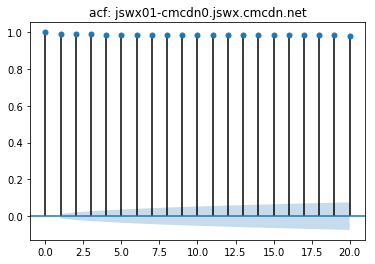

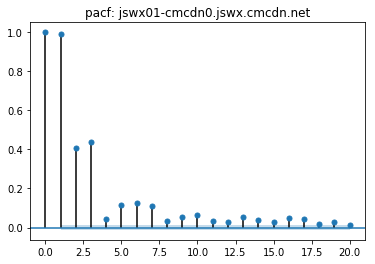

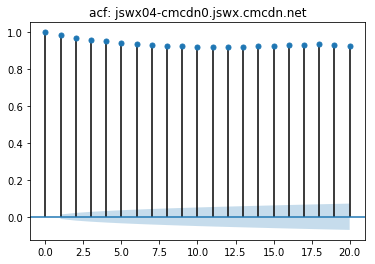

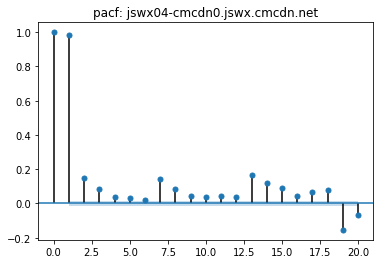

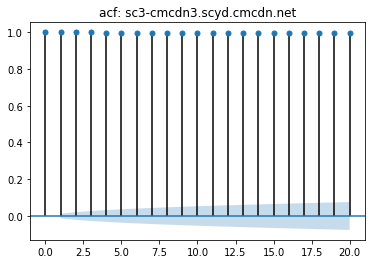

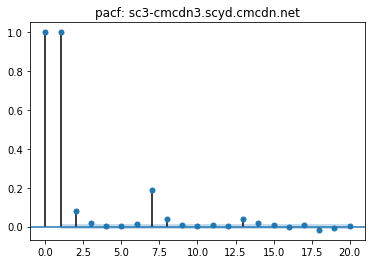

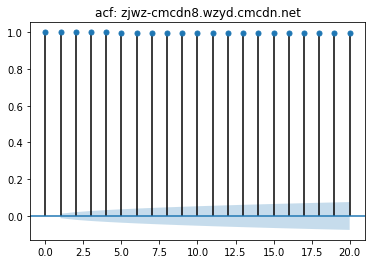

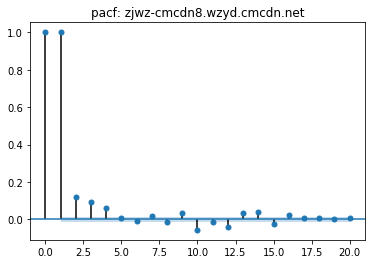

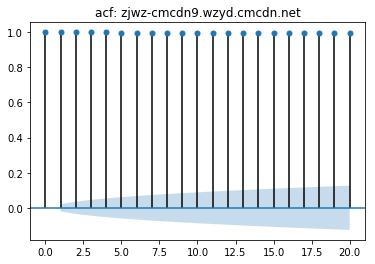

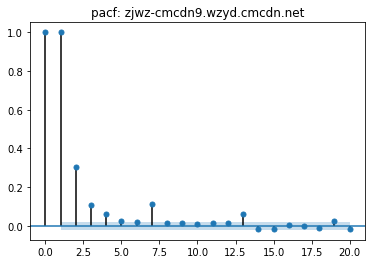

In [17]:
for i in range(len(cate)):
    
    acf = plot_acf(cate[i].value,lags=20)
    plt.title('acf: ' + str(title[i]))
    acf.show()
    
    pacf = plot_pacf(cate[i].value, lags=20)
    plt.title('pacf: ' + str(title[i]))
    pacf.show()

In [18]:
# train = cate1.value[:20000]
# test = cate1.value[20000:]
# train2, test2 = cate1[cate1.index <= '2019-01-27'], cate1['2019-01-28']


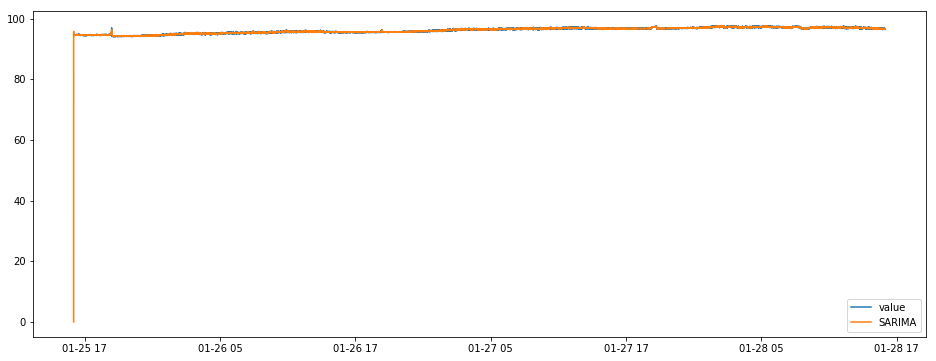

In [ ]:
model_predicts = []
for i in range(len(cate)):
    sarima_model = SARIMAX(cate[i].value, order=(2,0,4), seasonal_order=(0,0,0,0), enforce_stationarity=False).fit()
    y_hat_avg = sarima_model.predict()
    model_predicts.append(y_hat_avg)

    plt.figure(figsize=(16, 6))
    plt.plot(cate[i].value, label='value')
    plt.plot(y_hat_avg, label='SARIMA')
    plt.legend(loc='best')
    plt.show()

p为6,可以理解它周二数据会对周日数据产生影响.
d.差分参数.它定义了流程的集成级别.这意味着应该多少次应用时间序列differencing operator以使您的时间序列固定
q.可以将其解释为先前噪声(错误)影响当前值的数量

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
for i in range(len(cate)):
    rms = sqrt(mean_squared_error(cate[i].value, model_predicts[i]))
    print(title[i])
    print('MSE: ' + str(rms))
    print('-----------------------------')

In [ ]:
train_samples = []
for i in range(len(cate)):
    cate[i]['label'] = 0
    train_sample = cate[i].iloc[::6]
    train_sample = train_sample.reset_index(drop=True)
    train_sample['win_30min_mean'] = train_sample.value.rolling(window=30).mean()
    train_sample['win_30min_std'] = train_sample.value.rolling(window=30).std()
    train_sample.win_30min_mean.fillna(train_sample.value, inplace=True)
    train_sample.win_30min_std.fillna(0, inplace=True)
    train_sample['win_30min_value'] = train_sample['win_30min_mean'] + train_sample['win_30min_std']
    train_sample.loc[(train_sample['win_30min_value']>85.0) & 
                 (train_sample['win_30min_value']<train_sample['value']), 
                 'label'] = 1
    train_samples.append(train_sample)


In [ ]:
sns.countplot(x="label", data=train_samples[4])
train_samples[4].loc[:,'label'].value_counts()


In [ ]:
predicts = []
for i in range(len(model_predicts)):
    predict = model_predicts[i].to_frame()
    predict['label'] = 0
    predict = predict.iloc[::6]
    predict = predict.reset_index(drop=True)
    predict['win_30min_mean'] = 0
    predict['win_30min_std'] = 0
    predict.win_30min_mean = pd.rolling_mean(predict, window=30)
    predict.win_30min_std = pd.rolling_std(predict, window=30)
    predict['win_30min_std'].fillna(0, inplace=True)
    predict['win_30min_mean'].fillna(predict[0], inplace=True)
    predict['win_30min_value'] = predict['win_30min_mean'] + predict['win_30min_std']
    predict.loc[(predict['win_30min_value']>85.0) & 
                 (predict['win_30min_value']<predict[0]), 
                 'label'] = 1
    predicts.append(predict)

In [ ]:
sns.countplot(x="label", data=predicts[0])
predicts[0].loc[:,'label'].value_counts()


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, roc_auc_score
sums = 0
for i in range(5):
    sums = sums + accuracy_score(train_samples[i].label, predicts[i].label)
print(sums / 5)